## **Graph Neural Network**





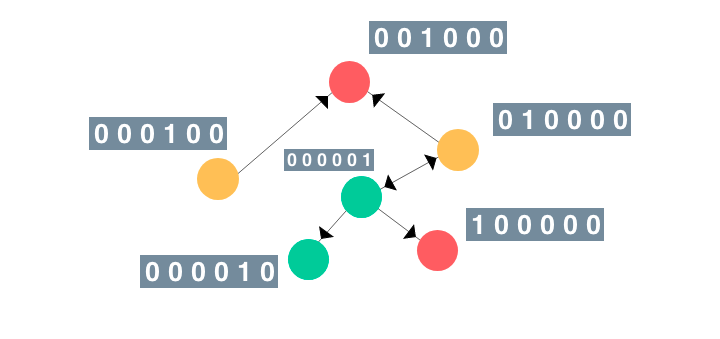

* [Imports](#first-bullet)
* [Graph Applications](#second-bullet)
* [Graph Terminology](#second-bullet)
* [Graph Representation](#second-bullet)
* [Graph Features](#second-bullet)
* [Pytorch Geometric Intro](#second-bullet)
* [Geometric Dataset & Transformation](#second-bullet)
* [Dataset Sampler and DataLoader](#second-bullet)
* [GNN Layers](#second-bullet)
* [GNN Training](#second-bullet)
* [GNN Custom Model](#second-bullet)
* [References & Resources](#second-bullet)


## Imports 
<a class="anchor" id="first-bullet"></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import collections
from IPython.display import Image
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import write_dot

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Graph Applications

So the usual categories of Supervised & Unsupervised are not most informative when it comes to graph. Graph NN Applications are categorized into following categories:

### Graph Classification,Regression

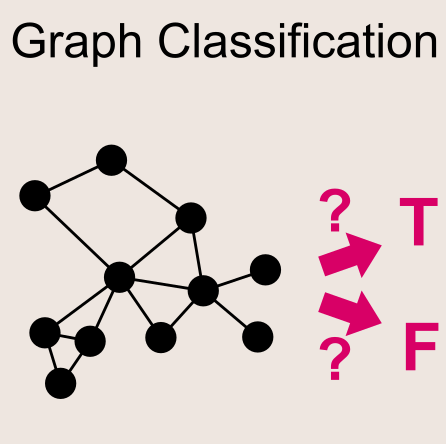

- want to classify the protein molecule, whether is useful or not. Or Fake news detection based upon the sources and links it connected to.
- we might want to build a regression model that could predict that molecule’s toxicity or acidity.
- It is multiple graphs per dataset and each graph is I.I.D finally single label per graph.

### Clustering & Community Detection

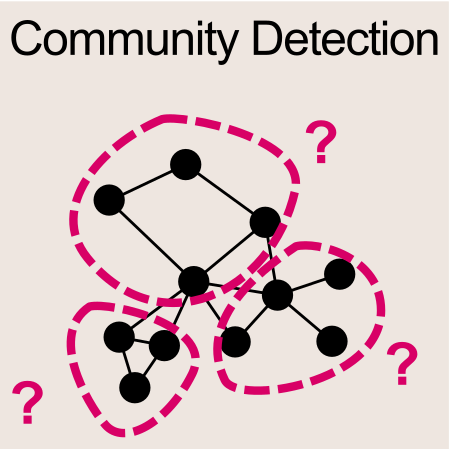

- Single Graph and want to cluster the graph into different regions.
- Detecting different community in Social media network
- can be supervised or unsupervised(no labels)

### Edge Prediction

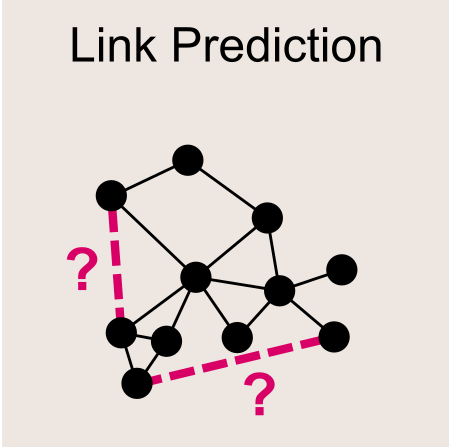

- Used in the Recommendation system to predict whether to recommend this product to user or not.
- Can be used to predict the weight of the edge.

### Node Classification

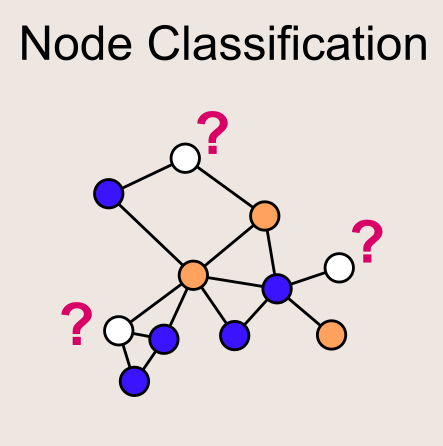

- Predict the node class. In Citation graph, can be used to predict the category of the paper based upon the paper it cited to.
- Useful information is in the links, so can't take this as I.I.D

## Graph Terminology

A graph represents the relations (edges) between a collection of Vertices (nodes).

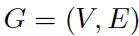

### Type of Edges

1.  Directed - There is direction associated with the arrow. can move in the direction of the arrow only while traversing.
2.  Undirected - There is no direction associated, so can move in either direction.
3.  Weighted - There is weight associated with the edge. It can be Cost,distance etc.
4.  Unweighted - There is no weight associated with the edge or weight is 1.
5.  Self Loop - Edge which connect one vertex with itself.
6.  Multi Edges - There are multiple edges present between two nodes.

In [ ]:
nodes_list = [1,2, 3,4,5,6,7,8]
edge_list = [(1, 2), (1, 3),(5,7),(4,8),(4,6),(3,8),(4,5),(8,5),(2,3),(6,6)]
## Undirected Graph
G = nx.Graph()
G.add_nodes_from(nodes_list)
G.add_edges_from(edge_list)
## Directed Graph
DG = nx.DiGraph()
DG.add_nodes_from(nodes_list)
DG.add_edges_from(edge_list)
## Weighted Graph
weight_edge_list = [(1, 2,3.0), (1, 3,4.0),(5,7,1),(4,8,4.0),(4,6,36.0),(3,8,2.0),(4,5,11.0),(6,6,4.3),(8,5,1.1),(2,3,1.1)]
DG1 = nx.DiGraph() #Graph(), MultiGraph()
DG1.add_nodes_from(nodes_list)
DG1.add_weighted_edges_from(weight_edge_list)
## Multi Graph
multi_edge_list = [(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)]
MG = nx.MultiGraph()
MG.add_weighted_edges_from(multi_edge_list)

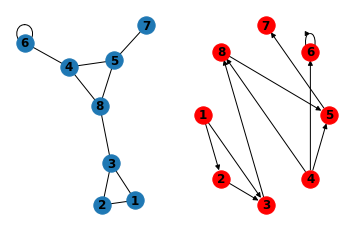

In [ ]:
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(DG, with_labels=True, font_weight='bold',node_color='red')

{(1, 2): Text(0.08002739924830343, 0.30262640386261225, '3.0'),
 (1, 3): Text(0.04303468204192774, 0.18223529041248407, '4.0'),
 (2, 3): Text(0.04073289649887512, 0.24486737967858893, '1.1'),
 (3, 8): Text(-0.11022741008266834, 0.0947119583656501, '2.0'),
 (4, 5): Text(-0.04524190476193252, -0.1392363235977404, '11.0'),
 (4, 6): Text(0.7147164357753062, -0.34212164058640393, '36.0'),
 (4, 8): Text(0.10261893604638819, -0.09713534992780577, '4.0'),
 (5, 7): Text(-0.6845164249409412, -0.05521672164185849, '1'),
 (6, 6): Text(1.0, -0.4250249308143569, '4.3'),
 (8, 5): Text(-0.3720558402661568, 0.022846676832904846, '1.1')}

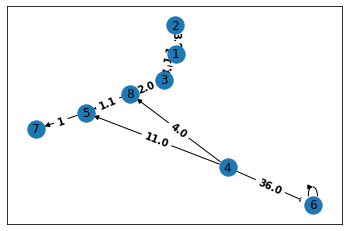

In [ ]:
## Plot weighted Graph
labels = nx.get_edge_attributes(DG1,'weight')
pos=nx.spring_layout(DG1)
nx.draw_networkx(DG1,pos)
nx.draw_networkx_edge_labels(DG1,pos, edge_labels=labels,font_weight='bold')

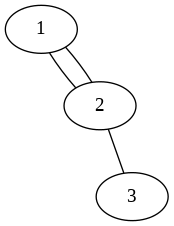

In [ ]:
write_dot(MG,'multi.dot') ## save multiGraph
!neato -T png multi.dot > multi.png
Image('multi.png')

### Graph Isomorphism

Is both graph are Isomorphic:  True


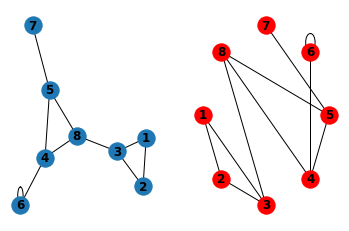

In [ ]:
## Graph isomorphism oriented differently
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, with_labels=True, font_weight='bold',node_color='red')
GM = nx.algorithms.isomorphism.GraphMatcher(G, G)
print('Is both graph are Isomorphic: ',GM.is_isomorphic())

### Independent & Identically Distributed(IID)

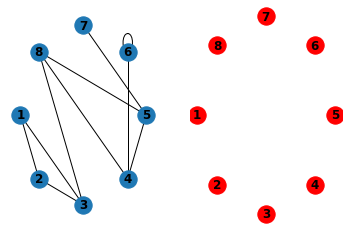

In [ ]:
## independent & identically distributed
subax1 = plt.subplot(121)
nx.draw_shell(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
G.remove_edges_from(edge_list)
nx.draw_shell(G, with_labels=True, font_weight='bold',node_color='red')

### Type of Graphs

1.  Homogeneous Graph - Normal graphs where are all the nodes are of same type
2.  Heterogeneous Graph -  certain edges only connect nodes of certain types. For e.g. In biomedical graph, there might be one type of node representing proteins, one type of representing drugs, and one type representing diseases.
3.  Bipartite Graph - It is the Type of the Heterogeneous graph, where nodes divides into two distinct sets.
4.  Multiplex Graph - where nodes are present in levels and some edges connecting nodes from level1 nodes to level2 nodes.

Nodes: 10
Edges: 15


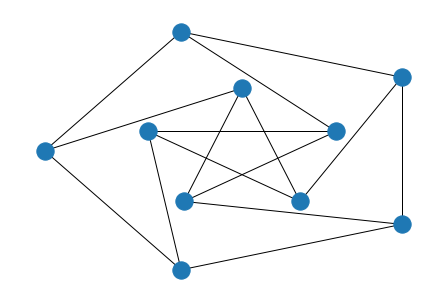

In [ ]:
## Homogeneous Graph
G = nx.petersen_graph()
print('Nodes:',G.number_of_nodes())
print('Edges:',G.number_of_edges())
nx.draw_shell(G, nlist=[range(5, 10), range(5)],  font_weight='bold',cmap=plt.cm.Blues)

<Figure size 648x648 with 0 Axes>

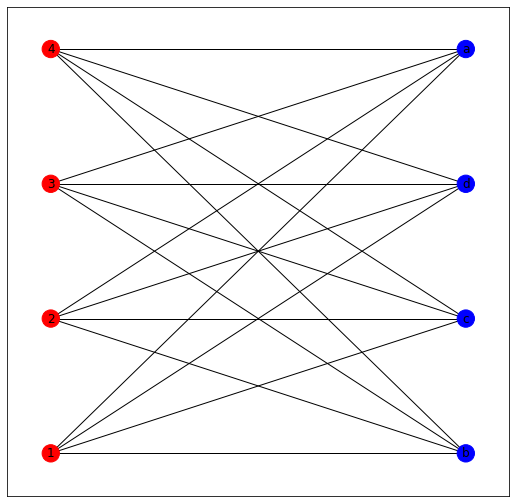

In [ ]:
## Bipartite Graph
color_list = ['r','r', 'r', 'r', 'b', 'b', 'b', 'b']
G = nx.complete_bipartite_graph([1,2,3,4],['a','b','c','d'])
bottom_nodes, top_nodes = nx.bipartite.sets(G)
pos = dict()
color = []
pos.update( (n, (1, i)) for i, n in enumerate(bottom_nodes) ) # put nodes from X at x=1
pos.update( (n, (2, i)) for i, n in enumerate(top_nodes) )
plt.figure(figsize =(9, 9))
nx.draw_networkx(G,pos=pos, with_labels = True, node_color =color_list)

#### Multiplex Graph

This can represent the Transportation System of the City.

One level Represent the people travelling in Train.

Other level represent the people travelling in Buses.

And there is connection means some people shift from one medium to another.


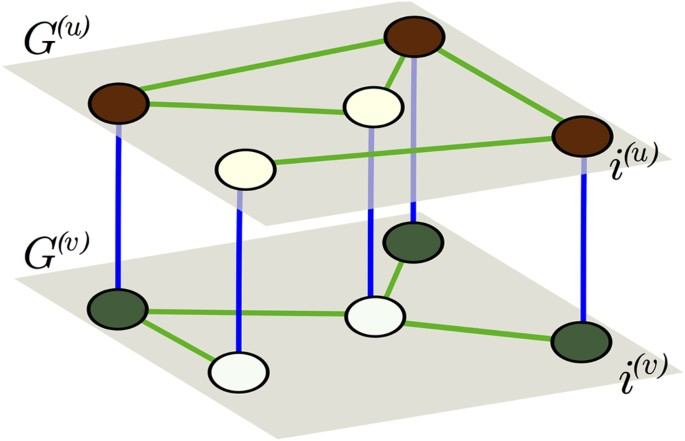

## Graph Representation

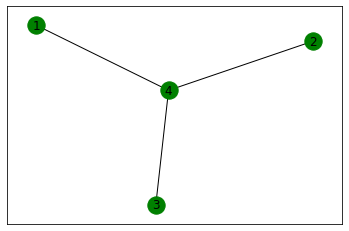

In [ ]:
G = nx.Graph()
## list of tuples
edge_list=[(1, 4), (2, 4), (3, 4) ]
G.add_edges_from(edge_list)
nx.draw_networkx(G, with_labels = True, node_color ='green')

In [ ]:
## Adjacency Matrix
print(G.nodes)
nx.adjacency_matrix(G).todense()

[1, 4, 2, 3]


matrix([[0, 1, 0, 0],
        [1, 0, 1, 1],
        [0, 1, 0, 0],
        [0, 1, 0, 0]], dtype=int64)

## Graph Features

### Node level Features

- Node degree: Simply counts the number of edges conected to a node. It measures how many neighbors a node has.
- Node centrality: How important a node’s neighbors are.
- Clustering coefficient: It measures how tightly clustered a node’s neighborhood is.It is the ratio between the actual number of triangles and the total possible number of triangles within a node neighborhood
- Motifs & Ego Graph: Rather than just counting triangles,
we could consider more complex structures, such as cycles of particular length, So it is a counts of how often these different motifs occur in their ego graph.

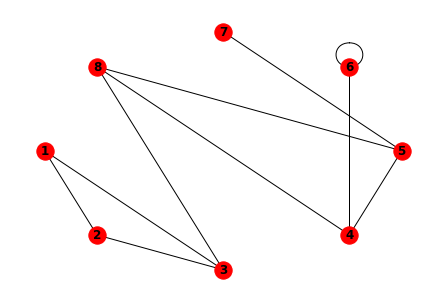

In [ ]:
nodes_list = [1,2, 3,4,5,6,7,8]
edge_list = [(1, 2), (1, 3),(5,7),(4,8),(4,6),(3,8),(4,5),(8,5),(2,3),(6,6)]
## Undirected Graph
G = nx.Graph()
G.add_nodes_from(nodes_list)
G.add_edges_from(edge_list)
nx.draw_shell(G, with_labels=True, font_weight='bold',node_color='red')

In [ ]:
## Node degree
print("Node Degree")
for v in G:
    if G.degree(v)>=1:
      print(f"{v:4} {G.degree(v):6}")

Node Degree
   1      2
   2      2
   3      3
   4      3
   5      3
   6      3
   7      1
   8      3


In [ ]:
## node Centrality
centrality = nx.eigenvector_centrality(G)
sorted([(v, round(c,2)) for v, c in centrality.items()],key=lambda item: item[1],reverse=True)[:6]

[(8, 0.49), (4, 0.47), (5, 0.43), (3, 0.37), (6, 0.29), (1, 0.23)]

In [ ]:
## Clustering Coefficients
nx.clustering(G)

{1: 1.0,
 2: 1.0,
 3: 0.3333333333333333,
 4: 0.3333333333333333,
 5: 0.3333333333333333,
 6: 0,
 7: 0,
 8: 0.3333333333333333}

In [ ]:
## Square motifs
nx.square_clustering(G)

{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0, 8: 0.0}

In [ ]:
## other features calculation
print('betweeness centrality',nx.betweenness_centrality(G))
print('shortest path',nx.shortest_path (G ,1 , 6 ))

betweeness centrality {1: 0.0, 2: 0.0, 3: 0.47619047619047616, 4: 0.2857142857142857, 5: 0.2857142857142857, 6: 0.0, 7: 0.0, 8: 0.5714285714285714}
shortest path [1, 3, 8, 4, 6]


### Graph Level Features

-  Degree Histogram: histogram to get the degree distribution
-  LHN similarity: Measure the ratio between the actual number of observed paths and the number of expected paths between two nodes. we draw a random graph with the same set of degrees as our given graph.

Zachary's karate club is a social network of a university karate club. The network captures 34 members of a karate club, documenting links between pairs of members who interacted outside the club. During the study a conflict arose between the administrator "John A" and instructor "Mr. Hi" (pseudonyms), which led to the split of the club into two.

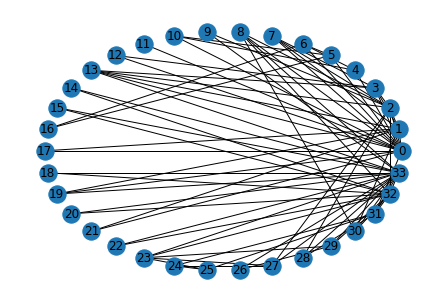

In [ ]:
G = nx.karate_club_graph()
nx.draw_circular(G, with_labels=True)

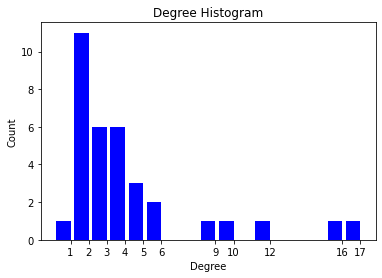

In [ ]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
_=plt.bar(deg, cnt, width=0.80, color='b')
_=plt.title("Degree Histogram")
_=plt.ylabel("Count")
_=plt.xlabel("Degree")
_=ax.set_xticks([d + 0.4 for d in deg])
_=ax.set_xticklabels(deg)

## Pytorch Geometric Intro

It is a library built upon PyTorch to easily write and train Graph Neural Networks. It is written & open sourced by Matthias Fey, who is a phd student at university of Dortmund.

In [ ]:
!pip install torch-scatter -f https://data.pyg.org/whl/torch-1.10.0+cu111.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-1.10.0+cu111.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git

Looking in links: https://data.pyg.org/whl/torch-1.10.0+cu111.html
     |████████████████████████████████| 7.9 MB 11.0 MB/s 
Looking in links: https://data.pyg.org/whl/torch-1.10.0+cu111.html
     |████████████████████████████████| 3.5 MB 11.0 MB/s 
  Cloning https://github.com/pyg-team/pytorch_geometric.git to /tmp/pip-req-build-vovbghqw
  Running command git clone -q https://github.com/pyg-team/pytorch_geometric.git /tmp/pip-req-build-vovbghqw
     |████████████████████████████████| 407 kB 13.4 MB/s 
     |████████████████████████████████| 45 kB 3.1 MB/s 
  Created wheel for torch-geometric: filename=torch_geometric-2.0.2-py3-none-any.whl size=568376 sha256=1faa30b25554ef5888ee38f46dee8ddcdb3419695e29765bbd53ae5ab722325c
  Stored in directory: /tmp/pip-ephem-wheel-cache-jmc0zubv/wheels/85/c9/07/7936efecad79b906348a7e9fb644d914160544efa9aa7f4b2b
Successfully built torch-geometric


In [ ]:
import torch
import torch_geometric
torch_geometric.__version__

'2.0.2'

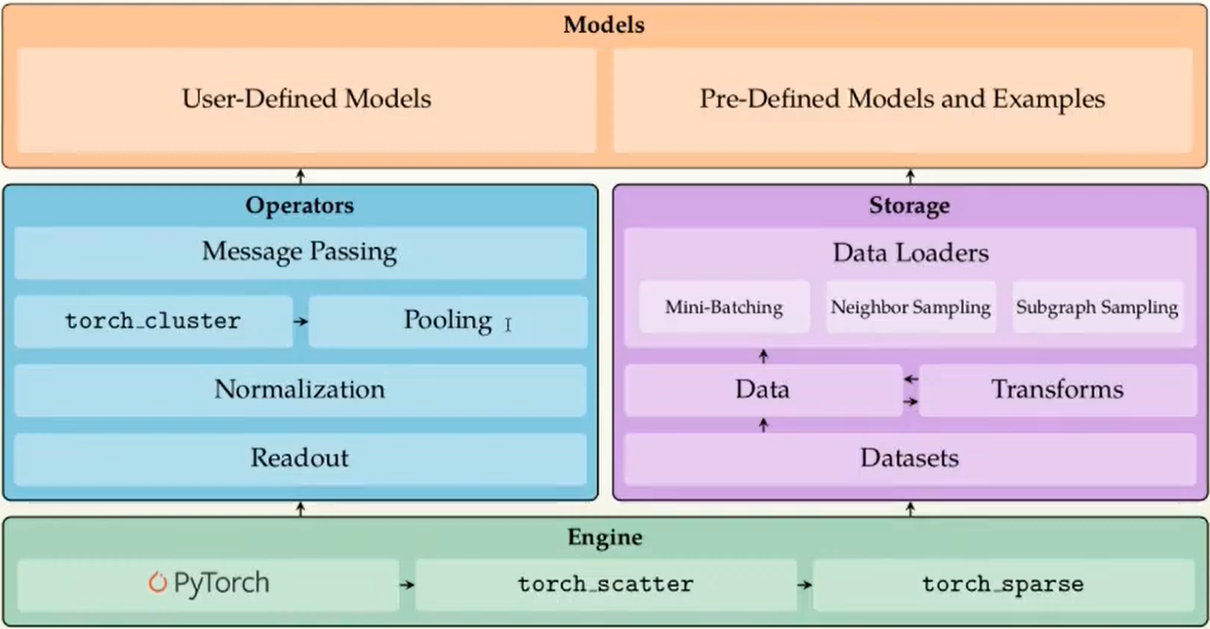

## Geometric Dataset & Transformation

- torch_geometric.Data - for creating and managing the collection of graphs
- torch_geometric.Dataset - module with collection of Datasets.
- torch_geometric.transforms - for applying the different transformations mentioned in this [link](https://pytorch-geometric.readthedocs.io/en/latest/modules/transforms.html)


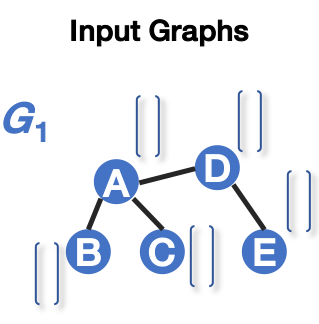

In [ ]:
features = torch.rand((20, 8), dtype=torch.float)
node_from = np.random.choice(20, 50)
node_to = np.random.choice(20, 50)
edges = torch.tensor([node_from, node_to])
ys = torch.rand((20)).round().long()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  after removing the cwd from sys.path.


In [ ]:
graph = torch_geometric.data.Data(x=features, edge_index=edges, y=ys)
print(graph)
print(f'Number of nodes Features: {graph.num_node_features}')
print(f'Number of nodes: {graph.num_nodes}')
print(f'Number of edges: {graph.num_edges}')
print(f'Has isolated nodes: {graph.has_isolated_nodes()}')
print(f'Has self-loops: {graph.has_self_loops()}')
print(f'Is undirected: {graph.is_undirected()}')

Data(x=[20, 8], edge_index=[2, 50], y=[20])
Number of nodes Features: 8
Number of nodes: 20
Number of edges: 50
Has isolated nodes: True
Has self-loops: False
Is undirected: False


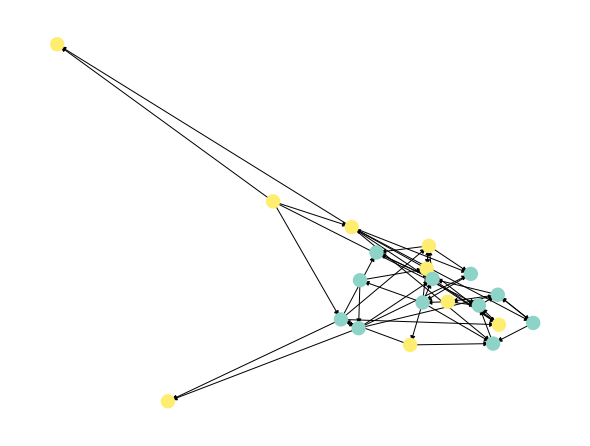

In [ ]:
from torch_geometric.utils import to_networkx
def plot_graph(graph):
  vis = to_networkx(graph)
  node_labels = graph.y.numpy()
  plt.figure(1,figsize=(8,6)) 
  nx.draw(vis, cmap=plt.get_cmap('Set3'),node_color = node_labels,node_size=70,linewidths=6)
  plt.show()
plot_graph(graph)

### Transformation

In [ ]:
transform = torch_geometric.transforms.Compose([
    # torch_geometric.transforms.AddTrainValTestMask('train_rest', num_val=5, num_test=5),
    torch_geometric.transforms.NormalizeFeatures(),
    torch_geometric.transforms.RemoveIsolatedNodes(),
    torch_geometric.transforms.AddSelfLoops(),
])
transform(graph)

Data(x=[20, 8], edge_index=[2, 70], y=[20])

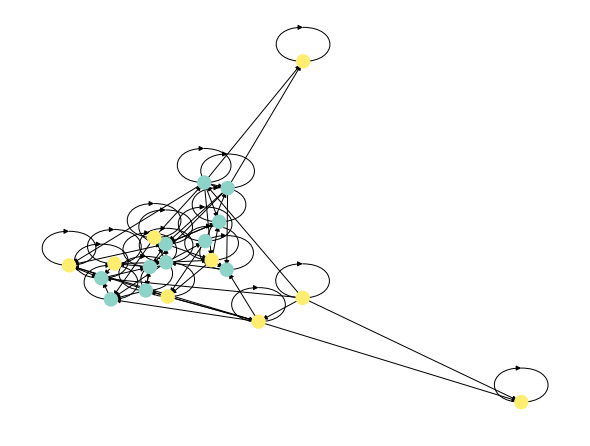

In [ ]:
plot_graph(graph)

Torch Geometric comes with 100s of preloaded Dataset. You can find the list [here](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html)

In [ ]:
torch_geometric.datasets.__all__[:10]

['KarateClub',
 'TUDataset',
 'GNNBenchmarkDataset',
 'Planetoid',
 'NELL',
 'CitationFull',
 'CoraFull',
 'Coauthor',
 'Amazon',
 'PPI']

- The Cora dataset consists of 2708 scientific publications classified into one of seven classes. These classes are Neural_Networks, Probabilistic_Methods,Genetic_Algorithms, Theory, Case_Based, Reinforcement_Learning,Rule_Learning. This dataset contains only a single, undirected citation graph.
- Aids Dataset consists of 2000 different graphs representing the small part of protein structure. It is labelled either 0 or 1.

In [ ]:
from torch_geometric.datasets import Planetoid,TUDataset
cora = Planetoid(root='/tmp/Cora', name='Cora')
aids = TUDataset(root="/tmp/Aids", name="AIDS")

Processing...
Done!
Extracting /tmp/Aids/AIDS/AIDS.zip
Processing...
Done!


In [ ]:
print(cora[0])
print('# of graphs:', len(cora))
print('Number of classes: ',cora.num_classes)
print('Node features ',cora.num_node_features)
print('node features:',cora[0].x)
print('node label:',cora[0].y)
print('edges:',cora[0].edge_index)

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
# of graphs: 1
Number of classes:  7
Node features  1433
node features: tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
node label: tensor([3, 4, 4,  ..., 3, 3, 3])
edges: tensor([[   0,    0,    0,  ..., 2707, 2707, 2707],
        [ 633, 1862, 2582,  ...,  598, 1473, 2706]])


In [ ]:
print(aids[0])
print('# of graphs:', len(aids))
print('Number of classes: ',aids.num_classes)
print('Node features ',aids.num_node_features)
print('node features:',aids[0].x)
print('node label:',aids[0].y)
print('edges:',aids[0].edge_index)

Data(edge_index=[2, 106], x=[47, 38], edge_attr=[106, 3], y=[1])
# of graphs: 2000
Number of classes:  2
Node features  38
node features: tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.]])
node label: tensor([0])
edges: tensor([[ 0,  0,  1,  1,  1,  2,  2,  2,  3,  3,  3,  4,  4,  4,  5,  5,  6,  6,
          7,  7,  7,  8,  8,  8,  9,  9, 10, 11, 11, 12, 12, 12, 12, 13, 13, 13,
         14, 14, 14, 15, 15, 15, 15, 16, 16, 17, 17, 18, 18, 18, 18, 19, 19, 19,
         20, 20, 21, 21, 21, 21, 22, 23, 23, 23, 24, 24, 25, 26, 27, 28, 28, 28,
         28, 29, 29, 30, 30, 31, 31, 31, 31, 32, 32, 32, 33, 33, 34, 34, 34, 34,
         35, 36, 36, 36, 37, 37, 38, 39, 40, 41, 42, 43, 44, 45, 45, 46],
        [ 1,  5,  0,  2, 11,  1,  3, 14,  2,  4,  6,  3,  5,  9,  0,  4,  3,  7,
          6,  8, 

## Sampler and DataLoader

- NeighborSampler - if want to to sample from the Large Graph and then do the training on the subpart. There are other sample scheme like RandomSampler
- DataLoader - If want to create the batches of graph to be fed into the Network

In [ ]:
sampler = torch_geometric.data.NeighborSampler(cora[0].edge_index, sizes=[3,10], batch_size=4, shuffle=False)

/usr/local/lib/python3.7/dist-packages/torch_geometric/deprecation.py:13: UserWarning: 'data.NeighborSampler' is deprecated, use 'loader.NeighborSampler' instead
  warnings.warn(out)


In [ ]:
print('Number of samples',len(sampler))
for i in sampler:
  print(i)
  break

Number of samples 677
(4, tensor([   0,    1,    2,    3, 2582,  633, 1862,  654,  652, 1986,  332, 1454,
        2544, 1666, 1166, 1866, 1701,  926,  470, 2009,  460,  743, 2000, 1873,
        1095,  366, 1993, 2003, 1127, 2615, 2122,  665]), [EdgeIndex(edge_index=tensor([[ 4,  5,  6,  2,  7,  8,  1,  9, 10, 11, 13, 12,  0,  6, 14,  0, 15, 16,
          0,  4, 16, 17,  1,  1, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,  2,
         27, 29, 30, 31,  2,  3],
        [ 0,  0,  0,  1,  1,  1,  2,  2,  2,  2,  2,  3,  4,  4,  4,  5,  5,  5,
          6,  6,  6,  6,  7,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10,
         10, 10, 10, 10, 11, 12]]), e_id=tensor([10306,  2569,  7565,     6,  2643,  2640,     3,  8132,  1382,  5774,
         6597, 10222,     2,  7568,  4551,     0,  7578,  6751,     1, 10308,
         6787,  3637,     5,     4,  1932,  8281,  1899,  3008,  8241,  7610,
         4267,  1494,  8211,  8263,  4399,     7,  8262, 10368,  8757,  2688,
            8,    11]),

In [ ]:
loader = torch_geometric.loader.DataLoader(aids, batch_size=32, shuffle=True)

In [ ]:
for data in loader:
  print(data.num_graphs)
  break

32


## GNN Layers

Pytorch Geometric have already builtin layers from the ideas present in different Graph NN Papers. here are the [list of layers](https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html)

### SAGEConv
[GraphSage](https://arxiv.org/abs/1706.02216)(2017) is one of the first papers to intoduce the neural message passing scheme between nodes to learn the node embedding. SAGEConv is based upon that.



Here Current node uses the neighbors to update its own node information. and this will repeat over k times. So after the k times The current node have information aggregated from k hops.

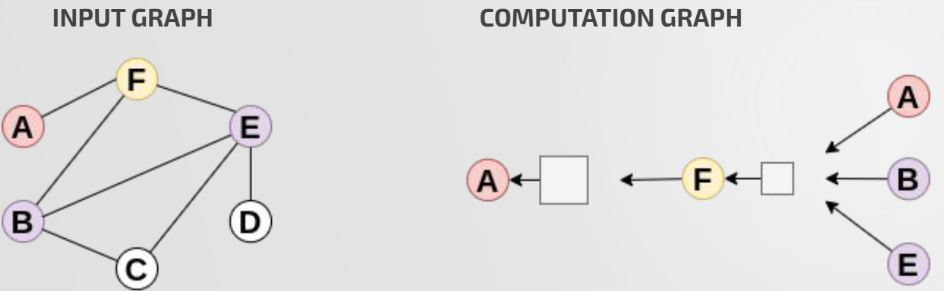

Here Wk and Bk are shared parameters among all the nodes

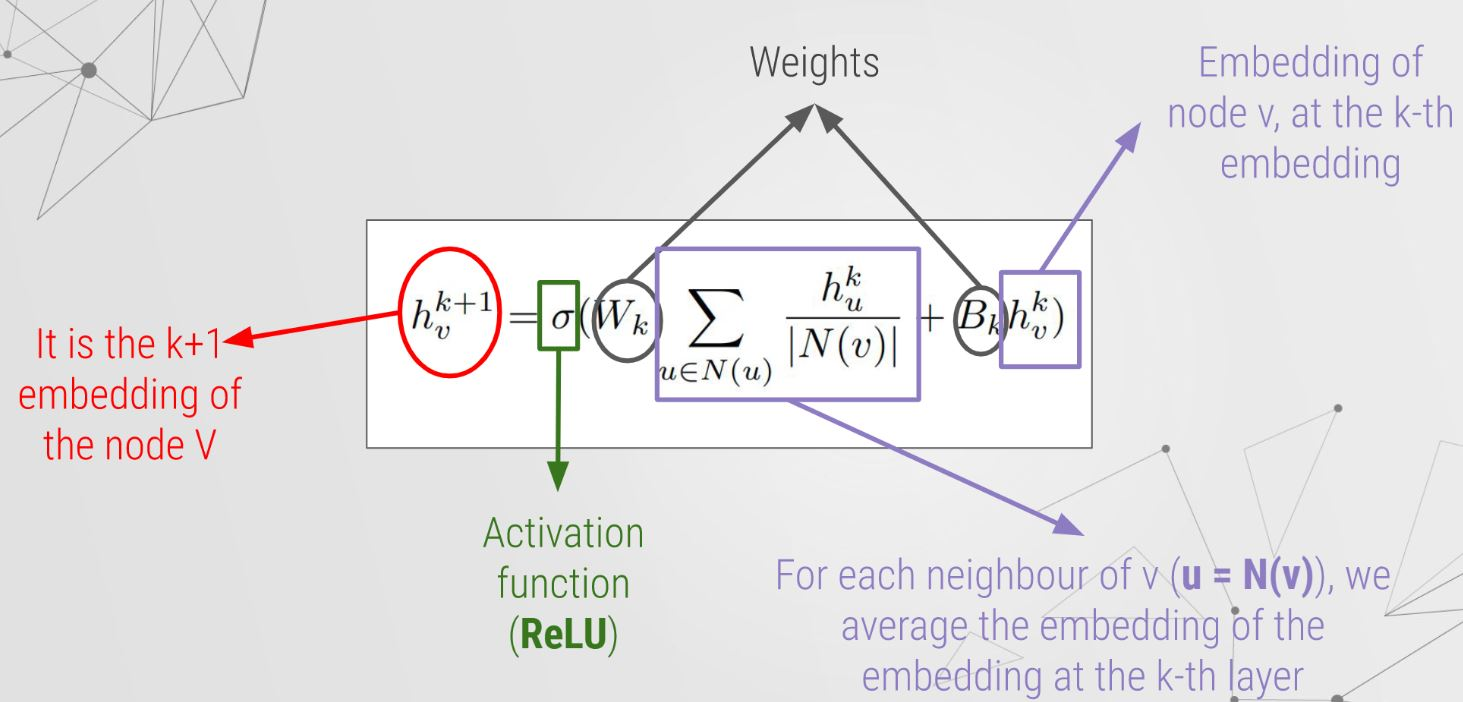

### GAT
This intoduced first in the paper [Graph Attention network](https://arxiv.org/abs/1710.10903). Here instead of doing simple average where all the neighbors information aggregated equally. We will gave score between 0 to 1 like how important that neighbor infomation to the current node.


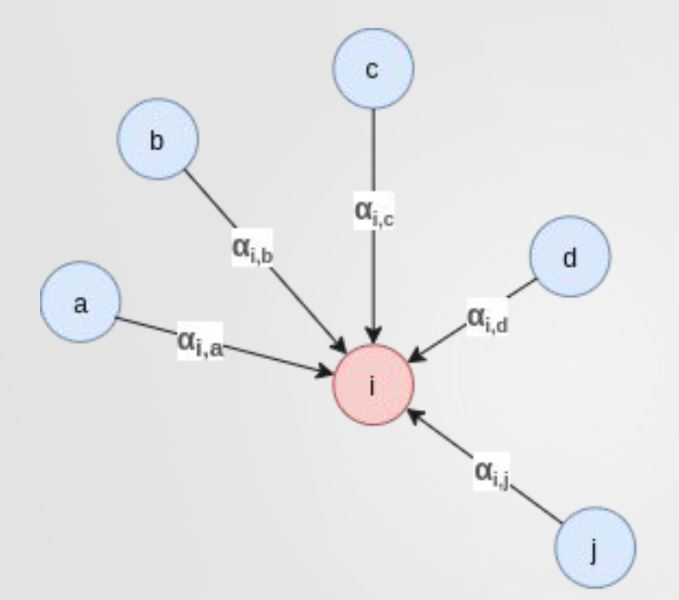

- W is the learnable weight matrices and a is the learnable weight vector.
- Can do Average or Concatenation between W.hi & W.hj.

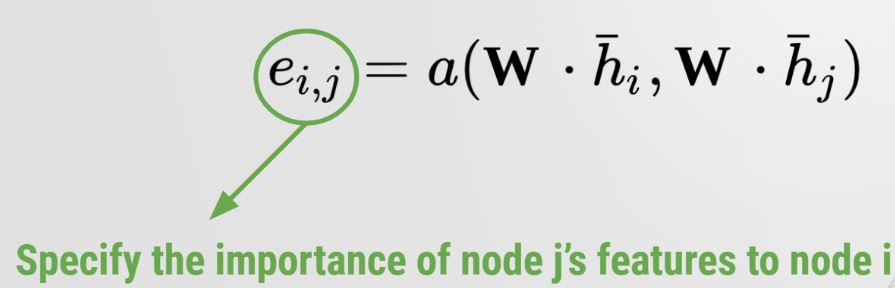

Do the softmax normalization to convert these scores between the range of 0 to 1.

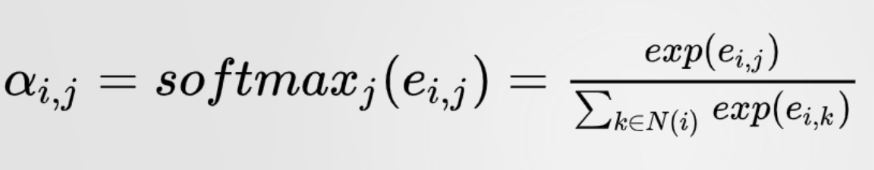

## GNN Training

In [ ]:
from torch_geometric.nn import SAGEConv,GAT,GATConv
import torch.nn.functional as F
torch.manual_seed(42)

In [ ]:
class Gnn(torch.nn.Module):
  def __init__(self,hidden_channels):
    super(Gnn, self).__init__()
    self.conv1 = SAGEConv(dataset.num_features,hidden_channels,aggr='mean') #mean,max,min,add
    self.gat = GATConv(hidden_channels,dataset.num_classes,heads=6)
  
  def forward(self, x, edge_index):
    x = self.conv1(x, edge_index)
    x = x.relu()
    x = F.dropout(x, p=0.5, training=self.training)
    x = self.gat(x,edge_index)
    return x

In [ ]:
dataset = cora
model = Gnn(hidden_channels=16)
print(model)

Gnn(
  (conv1): SAGEConv(1433, 16)
  (gat): GATConv(16, 7, heads=6)
)


In [ ]:
from sklearn.manifold import TSNE

def visualize(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())

    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.show()

Gnn(
  (conv1): SAGEConv(1433, 16)
  (gat): GATConv(16, 7, heads=6)
)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


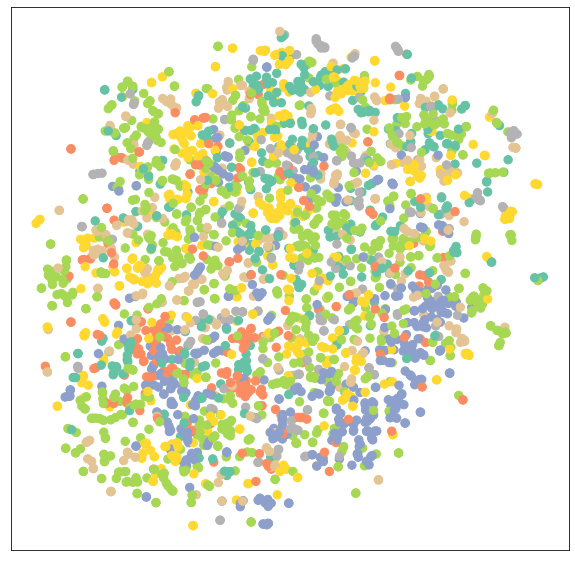

In [ ]:
model = Gnn(hidden_channels=16)
model.eval()

out = model(cora[0].x, cora[0].edge_index)
visualize(out, color=cora[0].y)

In [ ]:
def train(num_epoch,model):
  optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
  losses = torch.nn.CrossEntropyLoss()
  for epoch in range(num_epoch):
    model.train()
    optimizer.zero_grad()  # Clear gradients.
    out = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = losses(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

def test(model):
      model.eval()
      out = model(data.x, data.edge_index)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc

In [ ]:
data = dataset[0]
train(100,model)

### Evaluation

In [ ]:
test_acc = test(model)
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.7760


Now, the output embeddings of our trained model produces a far better clustering of nodes of the same category.

Gnn(
  (conv1): SAGEConv(1433, 16)
  (gat): GATConv(16, 7, heads=6)
)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


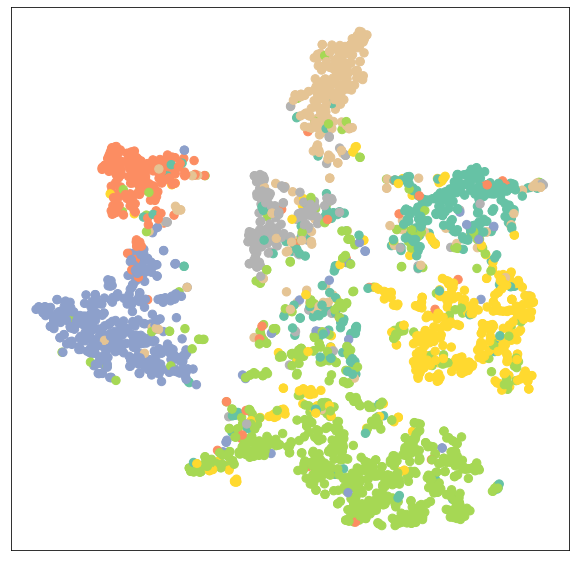

In [ ]:
model.eval()

out = model(data.x, data.edge_index)
visualize(out, color=data.y)

## GNN Custom Model

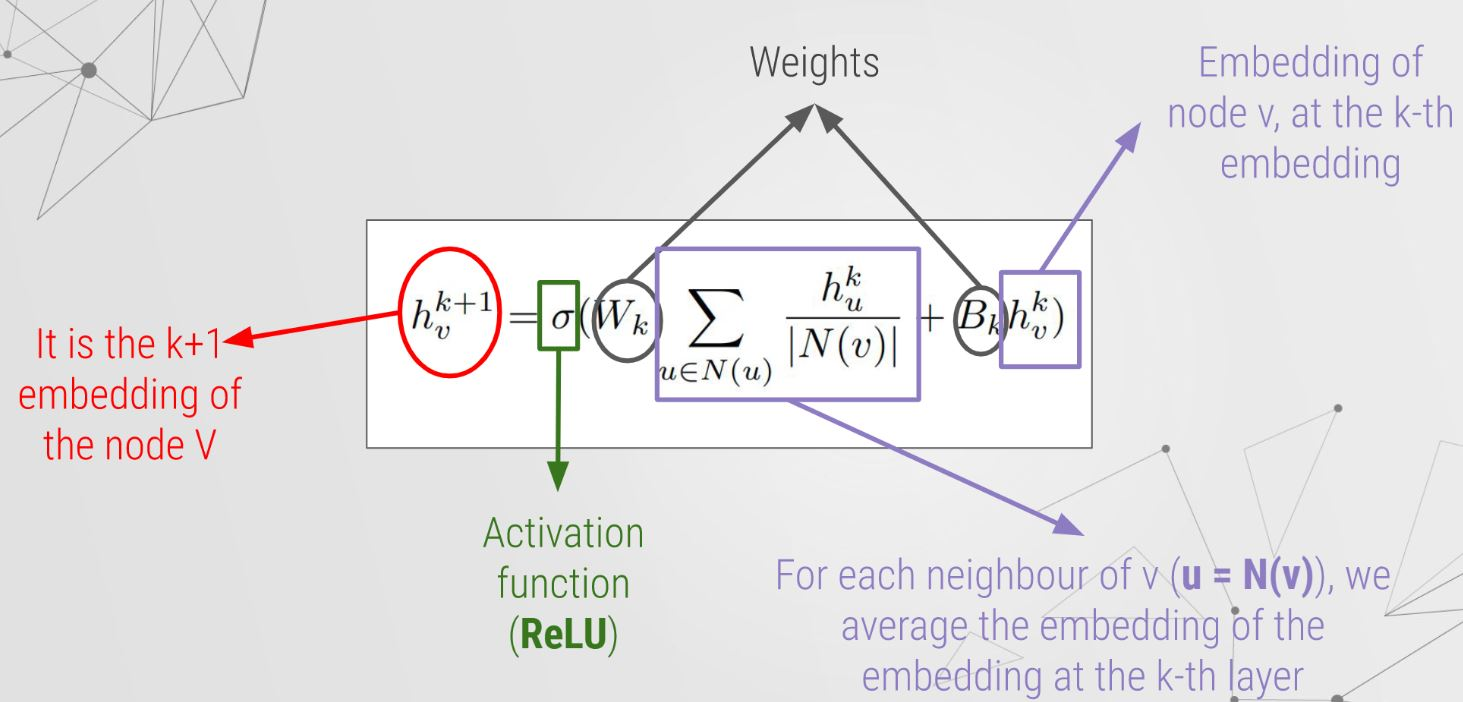

In [ ]:
from torch_geometric.utils import remove_self_loops,add_self_loops
class MySAGEConv(torch_geometric.nn.MessagePassing):
  def __init__(self,in_channels,out_channels):
    super(MySAGEConv,self).__init__(aggr='mean')
    self.lin = torch.nn.Linear(in_channels, out_channels,bias=True)
    self.act = torch.nn.ReLU()
    self.update_lin = torch.nn.Linear(in_channels ,out_channels,bias=False)
    self.update_act = torch.nn.ReLU()
  
  def forward(self,x,edge_index):
    # x has shape [N, in_channels]
    # edge_index has shape [2, E]
    edge_index, _ = remove_self_loops(edge_index)
    edge_index, _ = add_self_loops(edge_index, num_nodes=x.size(0))
    return self.propagate(edge_index, size=(x.size(0), x.size(0)), x=x)
  
  def message(self,x_j):
    # x_j has shape [E, in_channels]
    #x_j = self.lin(x_j)
    #x_j = self.act(x_j)
    return x_j
  
  def update(self, aggr_out, x):
    # aggr_out has shape [N, out_channels]
    #new_embed = torch.cat([aggr_out,x],dim=1)
    new_embed = self.update_lin(x)
    aggr_out = self.lin(aggr_out)
    #print(aggr_out.shape , new_embed.shape)
    new_embed = torch.add(aggr_out,new_embed)
    #new_embed = self.update_lin(new_embed)
    new_embed = self.update_act(new_embed)
    return new_embed

In [ ]:
class Gnn_new(torch.nn.Module):
  def __init__(self,hidden_channels):
    super(Gnn_new, self).__init__()
    self.conv1 = MySAGEConv(dataset.num_features,hidden_channels) #mean,max,min,add
    self.gat = GATConv(hidden_channels,dataset.num_classes,heads=6)
  
  def forward(self, x, edge_index):
    x = self.conv1(x, edge_index)
    x = x.relu()
    x = F.dropout(x, p=0.5, training=self.training)
    x = self.gat(x,edge_index)
    return x

In [ ]:
dataset = cora
model = Gnn_new(hidden_channels=16)
print(model)

Gnn_new(
  (conv1): MySAGEConv()
  (gat): GATConv(16, 7, heads=6)
)


In [ ]:
data = dataset[0]
train(100,model)

In [ ]:
test_acc = test(model)
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.7810


## References & Resources
- [Pytorch Geometric Official Tutorial](https://pytorch-geometric.readthedocs.io/en/latest/notes/colabs.html)
- [Tensorflow Gnn](https://github.com/tensorflow/gnn)
- [Pytorch Geometric Tutorial Youtube](https://www.youtube.com/playlist?list=PLGMXrbDNfqTzqxB1IGgimuhtfAhGd8lHF)
- [Pytorch Geometric Unofficial Tutorial](https://github.com/AntonioLonga/PytorchGeometricTutorial)
- [Stanford Graph Neural Network Course](https://www.youtube.com/playlist?list=PLoROMvodv4rPLKxIpqhjhPgdQy7imNkDn)
- [Google Research Gnn Blog](https://distill.pub/2021/gnn-intro/)
- [CSE705 UB Gnn Seminar Course](https://engineering.buffalo.edu/computer-science-engineering/graduate/courses/special-topics.html)
- [Networkx Official Doc](https://networkx.org/documentation/stable/tutorial.html)
- [Networkx Examples](http://snap.stanford.edu/class/cs224w-2011/nx_tutorial/nx_tutorial.pdf)
